# Correlation

For illustrations, let us load a data set about penguins.

In [1]:
import pandas as pd
import seaborn as sns
pen = sns.load_dataset("penguins")
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


There are often observations that we believe to be linked, either because one influences the other, or both are influenced by some other factor. That is, we say the quantities are **correlated**. There are several ways to measure correlation.

## Covariance

Suppose we have two series of observations, $[x_i]$ and $[y_i]$, representing observations of random quantities $X$ and $Y$ having means $\mu_X$ and $\mu_Y$. Then the values $[x_i-\mu_X]$ and $[y_i-\mu_Y]$ are deviations from the means. The **covariance** of the quantities is defined as 

$$
\Cov(X,Y) = \frac{1}{n} \sum_{i=1}^n (x_i-\mu_X)(y_i-\mu_Y).
$$

One explanation for the name is that $\Cov(X,X)$ and $Cov(Y,Y)$ are just the variances of $X$ and $Y$. However, covariance is not easy to interpret. Its units are the products of the units of the two variables, and it is sensitive to rescaling the variables (e.g., grams versus kilograms).

## Pearson correlation coefficient

We can remove the dependence on units and scale by applying the covariance to standardized scores for both variables:

$$
\rho(X,Y) = \frac{1}{n} \sum_{i=1}^n \left(\frac{x_i-\mu_X}{\sigma_X}\right)\left(\frac{y_i-\mu_Y}{\sigma_Y}\right)
= \frac{\Cov(X,Y)}{\sigma_X\sigma_Y},
$$

where $\sigma_X^2$ and $\sigma_Y^2$ are the variances of $X$ and $Y$. The value of $\rho$, called the **Pearson correlation coefficient**, is between $-1$ and $1$, with the endpoints indicating perfect correlation (negative or positive). 

For example, we might reasonably expect flipper length and body mass to be correlated in penguins, as a plot confirms:

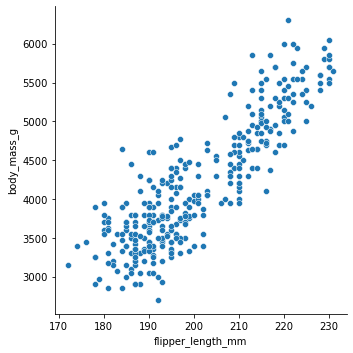

In [2]:
sns.relplot(data=pen,x="flipper_length_mm",y="body_mass_g")

Covariance allows us to confirm a positive relationship:

In [3]:
flip = pen["flipper_length_mm"]
mass = pen["body_mass_g"]

flip.cov(mass)

9824.416062149508

But is that a lot? The Pearson coefficient is more helpful.

In [4]:
flip.corr(mass)

0.8712017673060113

The value of about $0.87$ suggests that knowing one of the values would allow us to predict the other one rather well using a best-fit straight line (more on that in a future chapter).

As usual when dealing with means, however, the Pearson coefficient can be sensitive to outlier values. For example, let's correlate two series of length 20 that differ in just one value:

In [5]:
x = pd.Series(range(20))
y = x.copy()
y[4] = -100
x.corr(y)

0.43636501543147005

About half of the predictive value was lost. 

## Spearman coefficient

The Spearman coefficient is one way to lessen the impact of outliers when measuring correlation. The idea is that the values are used only in their relationship to one another. 

Define $r_i$ as the position of $x_i$ in a sorted reordering of the sampled values of $X$. Similarly, let $s_i$ be a position or *rank* series for the values of $Y$. Then the **Spearman coefficient** is defined as the Pearson coefficient of the variables $R$ and $S$.

For the example above, it's trivial to produce the rank series by hand.

In [6]:
r = pd.Series(range(1,21))
s = r.copy()
s[:5] = [2,3,4,5,1]

r.corr(s)

0.9849624060150375

This value is still very close to perfect correlation. pandas has a method for doing this calculation automatically on the original series.

In [7]:
x.corr(y,"spearman")

0.9849624060150375

As long as `y[4]` is negative, it doesn't matter what its particular value is, because that has no effect on the ranking.

In [8]:
y[4] = -1000000
x.corr(y,"spearman")

0.9849624060150375

Since real data almost always features outlying or anomalous values, it's important to think about the robustness of the statistics you choose.